## Modelisation with SegFormer

In [1]:
import sys  
sys.path.insert(0, './scripts')

# Import librairies, configs, helper functions
from helpers import *

config = base_config

config["width"] = 2048
config["height"] = 1024

n = NotebookProcessor(config)

{
    "width": 2048,
    "height": 1024,
    "classes": 8,
    "use_augment": true,
    "image_per_augment": 1,
    "max_evals": 1,
    "mlwflow_tracking_uri": "http://127.0.0.1:5000",
    "mlwflow_experiment_title": "",
    "train_sample_nb": 400,
    "val_sample_nb": 100,
    "use_saved_model_path": "",
    "gtFine_path": "./data/P8_Cityscapes_gtFine_trainvaltest.zip",
    "leftImg8bit_path": "./data/P8_Cityscapes_leftImg8bit_trainvaltest.zip",
    "data_path": "./data/gtFine",
    "epoch": 4
} 

Dataset already exist, skip downloading: ./data/P8_Cityscapes_gtFine_trainvaltest.zip
Dataset already exist, skip downloading: ./data/P8_Cityscapes_leftImg8bit_trainvaltest.zip

- Sampling the training dataset from 2975 to 400.

- Sampling the validation dataset from 326 to 100.


## Model definition

> SegFormer is a modern neural network framework designed for semantic segmentation tasks, leveraging transformer technology to understand and segment images efficiently. It combines a hierarchical transformer encoder with a lightweight MLP decoder, optimizing both accuracy and speed. This architecture allows SegFormer to capture rich, multi-scale features with less computational cost, making it highly effective for detailed image segmentation tasks.

I used it pre-train from cityscape

## Model usage

In [2]:
from transformers import pipeline
from PIL import Image
import requests
from transformers import SegformerImageProcessor, SegformerForSemanticSegmentation

def external_model_pred(model_name, img_path, device="cpu"):
    image = Image.open(img_path)
    
    processor = SegformerImageProcessor(do_resize=False)
    model = SegformerForSemanticSegmentation.from_pretrained(model_name)

    model.to(device)

    pixel_values = processor(image, return_tensors="pt").pixel_values.to(device)

    outputs = model(pixel_values)
    logits = outputs.logits
    
    predicted_segmentation_map = processor.post_process_semantic_segmentation(outputs, target_sizes=[image.size[::-1]])[0]
    predicted_segmentation_map = predicted_segmentation_map.cpu().numpy()
    
    return show_prediction(n.read_image(img_path),predicted_segmentation_map)

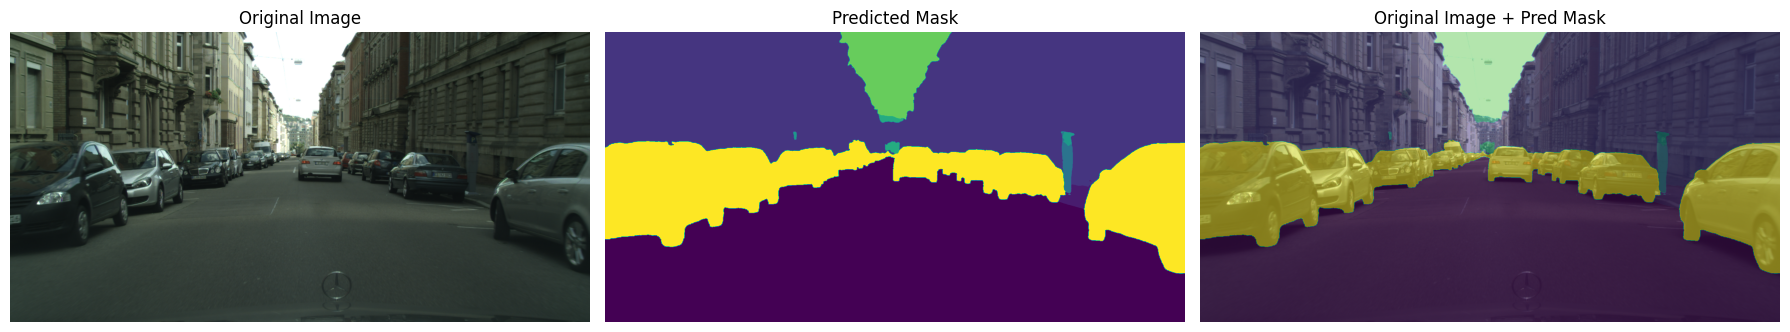

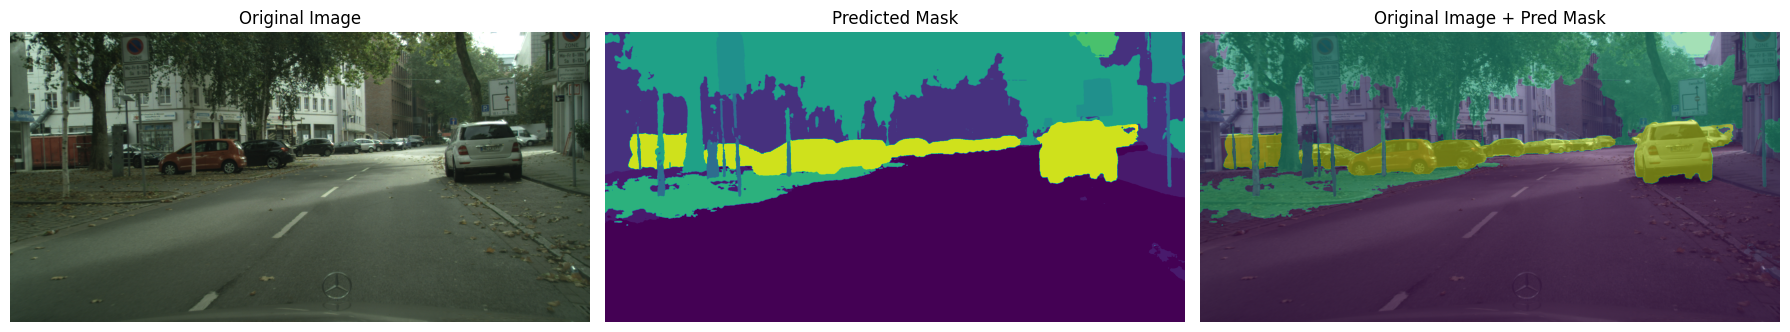

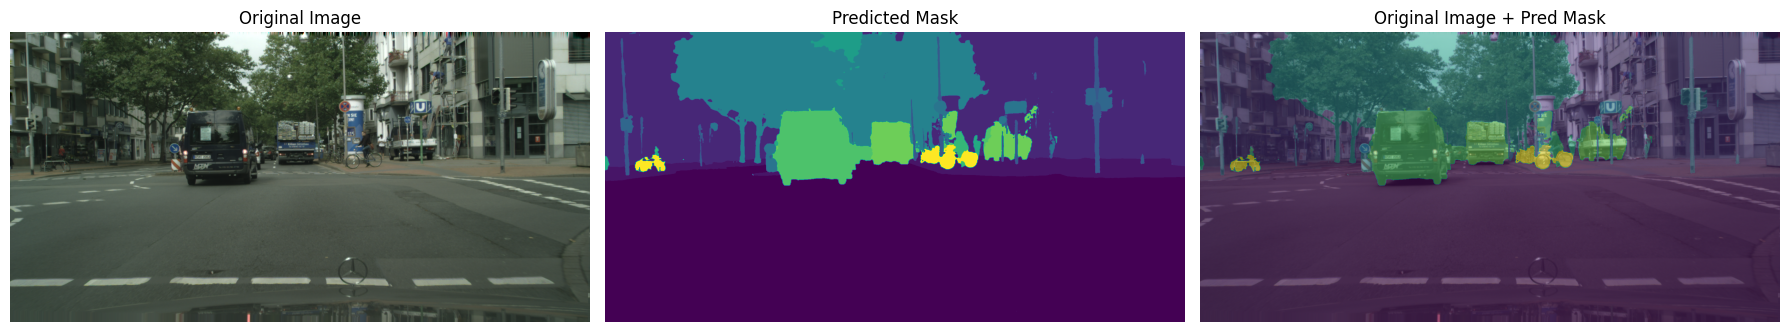

In [3]:
predicted_mask = external_model_pred("nvidia/segformer-b0-finetuned-cityscapes-768-768", n.img["train"][0])
predicted_mask = external_model_pred("nvidia/segformer-b0-finetuned-cityscapes-768-768", n.img["train"][1])
predicted_mask = external_model_pred("nvidia/segformer-b0-finetuned-cityscapes-768-768", n.img["train"][2])

In [4]:
# ANOTHER METHOD WITH SEGFORMER

# import torch  
# from transformers import SegformerForSemanticSegmentation, SegformerImageProcessor, SegformerFeatureExtractor  
# from PIL import Image  
# import requests  
  
# Load the feature extractor and model  
# feature_extractor = SegformerFeatureExtractor.from_pretrained("nvidia/segformer-b0-finetuned-cityscapes-768-768")  
# model = SegformerForSemanticSegmentation.from_pretrained("nvidia/segformer-b0-finetuned-cityscapes-768-768")  
# processor = SegformerImageProcessor(do_resize=False)

# # Load the image (replace the path with your image path or URL)  
# image_path = n.img["train"][0]
# # If the image is online, you can download it like this:  
# # image = Image.open(requests.get(image_url, stream=True).raw)  
# image = Image.open(image_path)  
  
# # Prepare the image for the model  
# inputs = feature_extractor(images=image, return_tensors="pt")
# outputs = model(**inputs)
# logits = outputs.logits  

# predicted_segmentation_map = processor.post_process_semantic_segmentation(outputs, target_sizes=[image.size[::-1]])[0]
# predicted_segmentation_map = predicted_segmentation_map.cpu().numpy()

# show_prediction(n.read_image(image_path),predicted_segmentation_map)